In [1]:
from helpers import copy, nx, ic

from simple_four_con import graph_data

from canonical_order_kant import KantCanonicalOrder

from rel2 import REL2

from edge_label import EdgeLabeling, EdgeColorings

from helpers_classes import CardinalDirections



In [2]:
co = KantCanonicalOrder(copy.deepcopy(graph_data))
co.initialize_order()
co.finish_order()

ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  7 to 1'
ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  5 to 2'
ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  5 to 1'
ic| f"{node_index} has no more chords": '5 has no more chords'
ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  6 to 1'
ic| f"{node_index} has no more chords": '6 has no more chords'
ic| f"{node_index} has no more chords": '7 has no more chords'
ic| f"ISSUE  FINDING UNMARKED CYCLE when vk = {self.vk}": 'ISSUE  FINDING UNMARKED CYCLE when vk = 2'
ic| f"completed order - vk == {self.vk}": 'completed order - vk == 1'


In [3]:
co.rel_helper

{7: {'unordered_boundary': [0, 1, 3, 4, 6], 'ordered_boundary': []},
 6: {'unordered_boundary': [0, 7, 5, 3, 4, 6], 'ordered_boundary': []},
 5: {'unordered_boundary': [0, 7, 5, 4, 6], 'ordered_boundary': []},
 4: {'unordered_boundary': [0, 7, 5, 6], 'ordered_boundary': [1, 2, 3]},
 3: {'unordered_boundary': [0, 7, 6], 'ordered_boundary': [1, 2, 4, 3]},
 2: {'unordered_boundary': [], 'ordered_boundary': [1, 2, 4, 5]}}

### base edge approach

ic

| edges: [(7, 1), (5, 1), (3, 1)]
ic| edges: [(0, 1)]


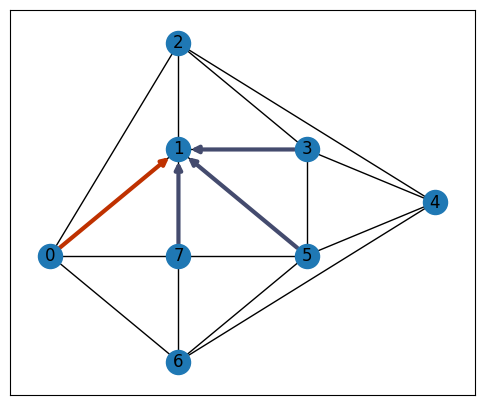

In [4]:
re = REL2(co)
re.step_order_base_edge()
re.plot_graph()

ic| edges: [(

7, 1), (5, 1), (3, 1)]
ic| edges: [(0, 1)]


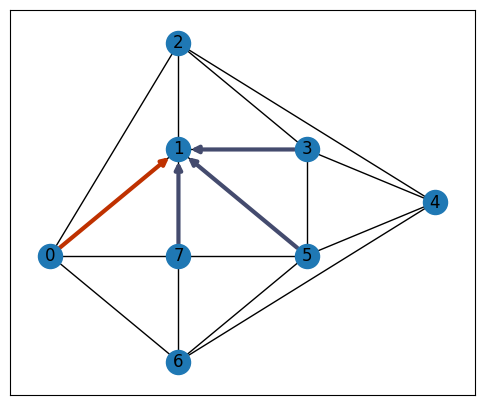

In [5]:
re = REL2(co)
re.step_order_base_edge()
re.plot_graph()

ic| edges: [(7, 1), (5, 1), (3, 1), (4, 3)]
ic| edges: [(0, 1), (5, 3)]


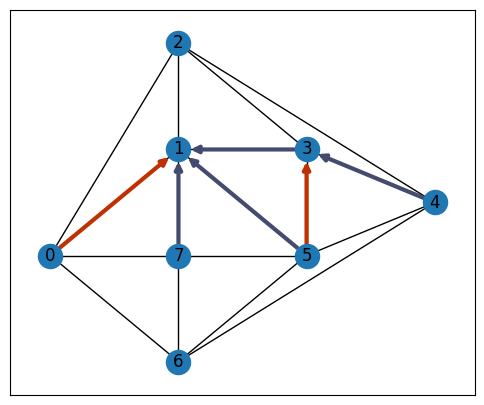

In [6]:
re.step_order_base_edge()
re.plot_graph()

ic| edges: [(7, 1), (5, 1), (3, 1), (4, 3)]
ic| edges: [(0, 1), (5, 3), (5, 4)]


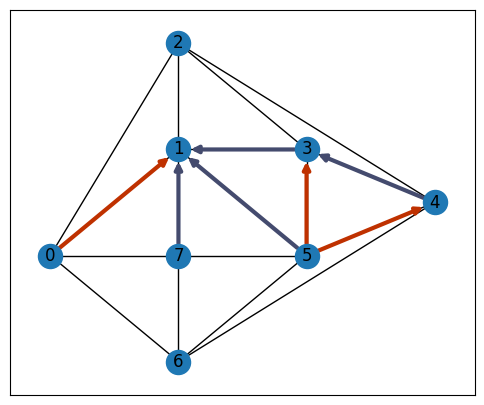

In [7]:
re.step_order_base_edge()
re.plot_graph()

ic| edges: [(7, 1), (5, 1), (3, 1), (4, 3), (6, 5)]
ic| edges: [(0, 1), (5, 3), (5, 4), (7, 5)]


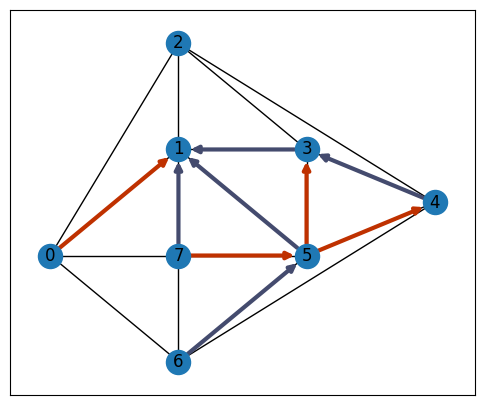

In [8]:
re.step_order_base_edge()
re.plot_graph()

In [9]:
re.step_order_base_edge()
re.plot_graph()

AssertionError: No valid nbs for 7

### corner rel

In [10]:
# re = REL2(co)
re.RELCorners.order_all_corners()
# re.step_order_interior()
# re.plot_graph()


ic| edges: [(7, 1), (5, 1), 

(3, 1), (4, 3), (6, 5), (1, 2), (3, 2), (6, 5), (6, 7)]
ic| edges: [(0, 1), (5, 3), (5, 4), (7, 5), (0, 1), (0, 7), (3, 4), (5, 4)]


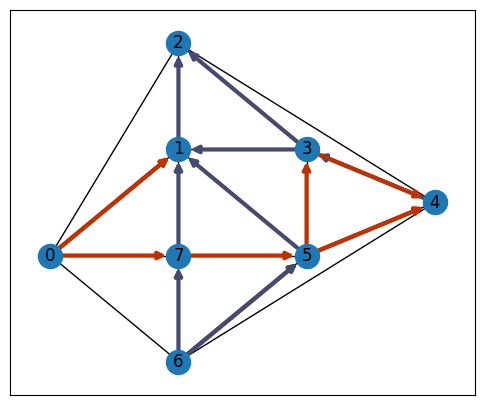

In [11]:
re.plot_graph()

### interior work 

ic| self.curr_node_index: 7, self.curr_order: 2
ic| edges: [(1, 2), (3, 2), (6, 5), (6, 7), (7, 1)]
ic| edges: [(0, 1), (0, 7), (3, 4), (5, 4), (7, 5)]


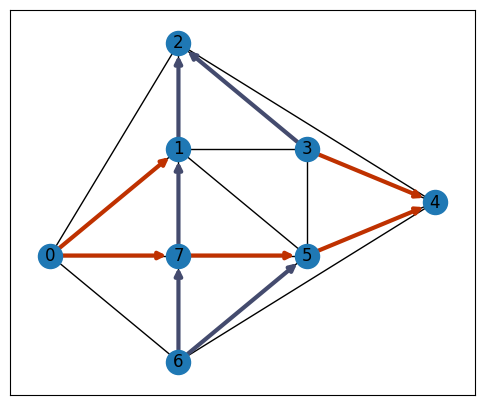

In [26]:
re.step_order_interior()
re.plot_graph()


ic| self.curr_node_index: 5, self.curr_order: 3
ic| edges: [(1, 2), (3, 2), (6, 5), (6, 7), (7, 1), (5, 1)]
ic| edges: [(0, 1), (0, 7), (3, 4), (5, 4), (7, 5), (5, 3)]


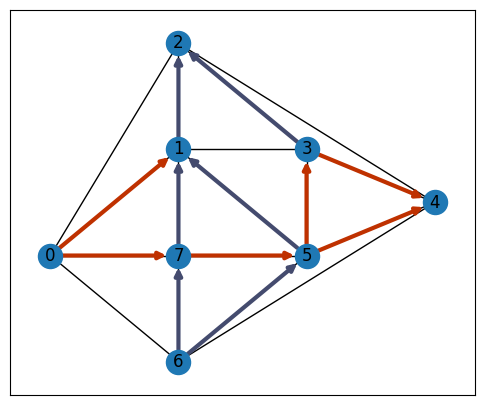

In [27]:
re.step_order_interior()
re.plot_graph()

In [28]:
re.step_order_interior()
re.plot_graph()

AssertionError: Not enough nbs of 4 have been ordered: NBs=[3, 5], Ordered NBs = [3]